<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [5]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.25, stratify=y_train)

In [7]:
x_train.shape

(3000, 5)

In [8]:
x_cv.shape

(1000, 5)

In [9]:
x_test.shape

(1000, 5)

In [10]:
clf = SVC(gamma = 0.001, C = 100)
clf.fit(x_train,y_train)

SVC(C=100, gamma=0.001)

In [11]:
dec = clf.decision_function(x_cv)

In [12]:
def decision_func(clf,xcv):
    decision = []
    for x_q in xcv:
        dec = np.sum(clf.dual_coef_ * np.exp(-clf.gamma*np.sum((clf.support_vectors_ - x_q)**2, axis=1))) + clf.intercept_
        decision.append(dec)
    return np.array(decision)

In [13]:
dec[0:5]

array([-0.14328323, -2.21472069, -4.42832628,  1.87987879, -2.46758273])

In [14]:
f_cv = decision_func(clf,x_cv)

In [32]:
f_cv[0:5]

array([[-0.14328323],
       [-2.21472069],
       [-4.42832628],
       [ 1.87987879],
       [-2.46758273]])

First 5 values of both sklearn's decision function and custom decision function match as shown above

In [29]:
f_test = decision_func(clf,x_test)

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [33]:
N_plus = np.count_nonzero(y_train)
N_minus = len(y_train) - N_plus
y_plus = (N_plus + 1) / (N_plus + 2)
y_minus = 1 / (N_minus + 2)
y_plat_cv = [y_plus if i > 0 else y_minus for i in y_cv]

In [34]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    
    w = np.zeros_like(dim)
    b = 0
    return w,b

In [35]:
def sigmoid(z):
    sig = 1 / (1+np.exp(-z))
    return sig

In [36]:
def logloss(y_true,y_pred):
    n = len(y_true)
    loss = 0
    for i in range(n):
        loss = loss + (y_true[i] * (np.log10(y_pred[i]))) + ((1-y_true[i]) * np.log10(1-y_pred[i]))
    loss = - 1 * (loss / n)
    return loss

In [37]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    
    dw = x * (y - sigmoid(np.dot(np.transpose(w),x) + b)) - ((alpha / N)*w)
    return dw

In [38]:
 def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b ''' 
     db = y - sigmoid(np.dot(np.transpose(w),x) + b)
     return db

In [39]:
import pdb 
def Sgd_algo(X_train,y_train,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''    
    N = len(X_train)
    w,b = initialize_weights(X_train[0])
    train_loss = []
    test_loss = []
    for i in range(epochs):
        for j in range(N):  
            dw = gradient_dw(X_train[j],y_train[j],w,b,alpha,N)
            db = gradient_db(X_train[j],y_train[j],w,b)
            w = w + (eta0*dw)
            b = b + (eta0*db)
        z = np.dot(X_train,w) + b
        y_pred_tr = sigmoid(z)
        tr_loss = logloss(y_train,y_pred_tr)
        train_loss.append(tr_loss)
        
        if i >3:
            if train_loss[-1] == train_loss[-2]:
                break
                
    return w,b,train_loss,

In [47]:
alpha=0.0001
eta0=0.0001
epochs=20
w,b,loss=Sgd_algo(f_cv,y_plat_cv,epochs,alpha,eta0)

Text(0, 0.5, 'loss')

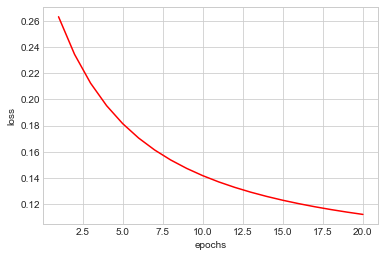

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
epoch = [i for i in range(1,21)]
ax.plot(epoch,loss,color='red')
plt.xlabel('epochs')
plt.ylabel('loss')

In [41]:
w2,b2,loss2 =Sgd_algo(f_test,y_test,epochs,alpha,eta0) 

In [44]:
prob = 1/(1+np.exp(-(w2*f_test+b2)))

Text(0, 0.5, 'loss')

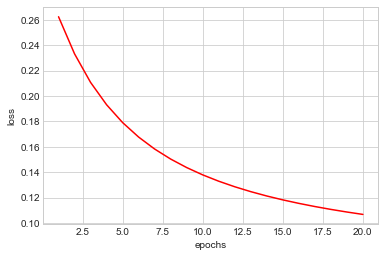

In [50]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
epoch = [i for i in range(1,21)]
ax.plot(epoch,loss2,color='red')
plt.xlabel('epochs')
plt.ylabel('loss')